In [1]:
import pandas  as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
%matplotlib inline
import numpy as np

In [2]:
data = pd.read_csv('pax_local_all_agreements_data.csv')

In [3]:
data['year'] = data['Dat'].apply(lambda x:int(x[:4]))

In [4]:
data['gdp'] = data['gdp'].apply(lambda x:0 if pd.isna(x) else int(str(x).replace(",","")))

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 57 columns):
Con                286 non-null object
gdp                286 non-null int64
Contp              286 non-null object
PP                 286 non-null int64
PPName             286 non-null object
Reg                286 non-null object
AgtId              286 non-null int64
Ver                286 non-null int64
Agt                286 non-null object
Dat                286 non-null object
Status             286 non-null object
Lgt                286 non-null int64
N_characters       286 non-null int64
Stage              286 non-null object
StageSub           280 non-null object
Part               283 non-null object
ThrdPart           145 non-null object
OthAgr             70 non-null object
Loc1ISO            286 non-null object
Loc2ISO            14 non-null object
Loc1GWNO           286 non-null int64
Loc2GWNO           14 non-null float64
UcdpCon            214 non-null object
UcdpAgr

Text(0, 0.5, 'The mean of MedCentState')

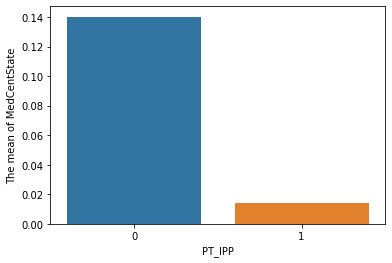

In [6]:
###看gdp与调解人类型
tmp2 = data.groupby("PT_IPP").MedCentState.mean().reset_index()
ax1 = sns.barplot(tmp2['PT_IPP'].to_list(),tmp2['MedCentState'].to_list())
ax1.set_xlabel("PT_IPP")
ax1.set_ylabel("The mean of MedCentState")

Text(0, 0.5, 'The mean of MedRegState')

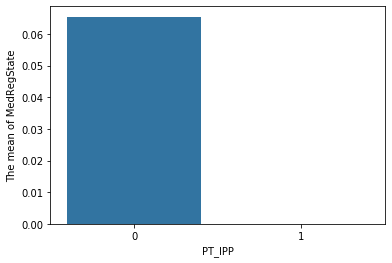

In [31]:
tmp2 = data.groupby("PT_IPP").MedRegState.mean().reset_index()
ax1 = sns.barplot(tmp2['PT_IPP'].to_list(),tmp2['MedRegState'].to_list())
ax1.set_xlabel("PT_IPP")
ax1.set_ylabel("The mean of MedRegState")

Text(0, 0.5, 'The mean of MedOtherUnclear')

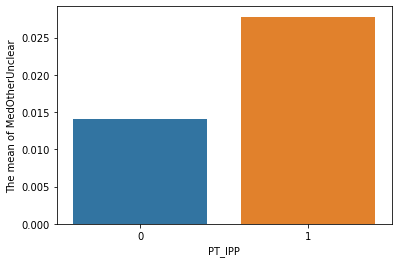

In [43]:
tmp2 = data.groupby("PT_IPP").MedOtherUnclear.mean().reset_index()
ax1 = sns.barplot(tmp2['PT_IPP'].to_list(),tmp2['MedOtherUnclear'].to_list())
ax1.set_xlabel("PT_IPP")
ax1.set_ylabel("The mean of MedOtherUnclear")

Text(0, 0.5, 'The mean of MedLocState')

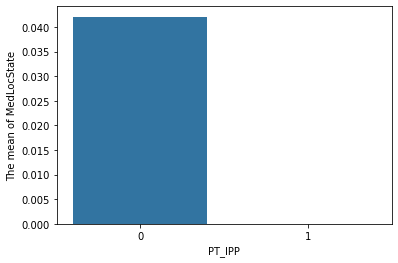

In [8]:
tmp2 = data.groupby("PT_IPP").MedLocState.mean().reset_index()
ax1 = sns.barplot(tmp2['PT_IPP'].to_list(),tmp2['MedLocState'].to_list())
ax1.set_xlabel("PT_IPP")
ax1.set_ylabel("The mean of MedLocState")

Text(0, 0.5, 'The mean of MedLocArmed')

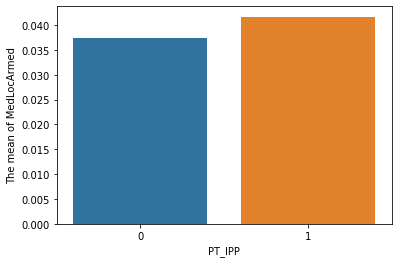

In [9]:
tmp2 = data.groupby("PT_IPP").MedLocArmed.mean().reset_index()
ax1 = sns.barplot(tmp2['PT_IPP'].to_list(),tmp2['MedLocArmed'].to_list())
ax1.set_xlabel("PT_IPP")
ax1.set_ylabel("The mean of MedLocArmed")

Text(0, 0.5, 'The mean of MedReDomEld')

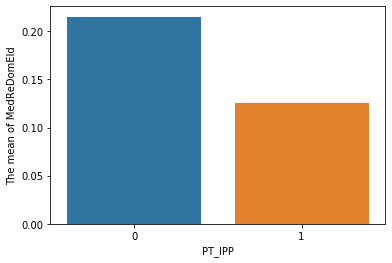

In [10]:
tmp2 = data.groupby("PT_IPP").MedReDomEld.mean().reset_index()
ax1 = sns.barplot(tmp2['PT_IPP'].to_list(),tmp2['MedReDomEld'].to_list())
ax1.set_xlabel("PT_IPP")
ax1.set_ylabel("The mean of MedReDomEld")

Text(0, 0.5, 'The mean of MedLocCivSoc')

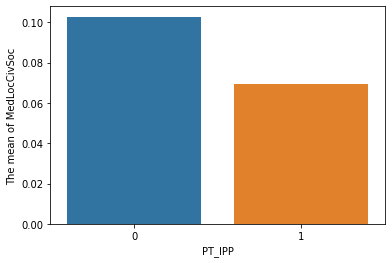

In [11]:
tmp2 = data.groupby("PT_IPP").MedLocCivSoc.mean().reset_index()
ax1 = sns.barplot(tmp2['PT_IPP'].to_list(),tmp2['MedLocCivSoc'].to_list())
ax1.set_xlabel("PT_IPP")
ax1.set_ylabel("The mean of MedLocCivSoc")

Text(0, 0.5, 'The mean of MedIntActor')

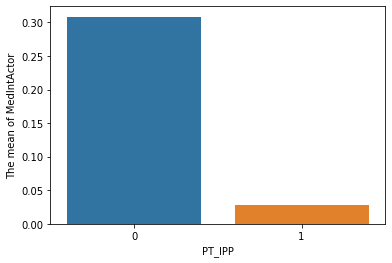

In [12]:
tmp2 = data.groupby("PT_IPP").MedIntActor.mean().reset_index()
ax1 = sns.barplot(tmp2['PT_IPP'].to_list(),tmp2['MedIntActor'].to_list())
ax1.set_xlabel("PT_IPP")
ax1.set_ylabel("The mean of MedIntActor")

In [13]:
gdp_data = data.query("gdp>0").copy()
gdp_data['gdp_w'] = gdp_data['gdp'].apply(lambda x:int(round(x/100000000,0)))
gdp_data['gdp_bin'] = pd.qcut(gdp_data['gdp_w'],5)

In [14]:
gdp_data['gdp_bin'].value_counts()

(17.999, 22.0]     16
(379.0, 526.0]     14
(262.0, 379.0]     13
(22.0, 262.0]      13
(526.0, 4046.0]    10
Name: gdp_bin, dtype: int64

Text(0, 0.5, 'The mean of MedOtherUnclear')

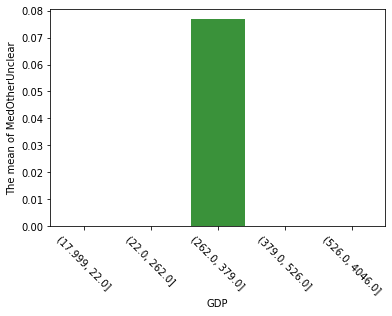

In [81]:
tmp2 = gdp_data.groupby("gdp_bin").MedOtherUnclear.mean().reset_index()
ax1 = sns.barplot(tmp2['gdp_bin'].to_list(),tmp2['MedOtherUnclear'].to_list())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-45)
ax1.set_xlabel("GDP")
ax1.set_ylabel("The mean of MedOtherUnclear")

Text(0, 0.5, 'The mean of MedCentState')

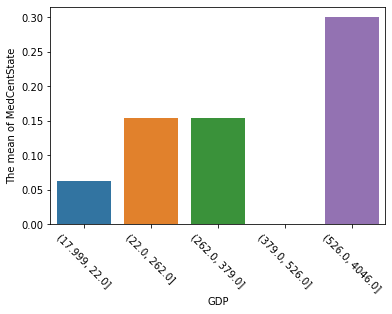

In [16]:
col = 'MedCentState'
tmp2 = gdp_data.groupby("gdp_bin")[col].mean().reset_index()
ax1 = sns.barplot(tmp2['gdp_bin'].to_list(),tmp2[col].to_list())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-45)
ax1.set_xlabel("GDP")
ax1.set_ylabel("The mean of "+col)

Text(0, 0.5, 'The mean of MedRegState')

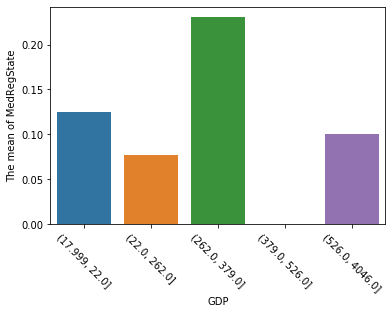

In [17]:
col = 'MedRegState'
tmp2 = gdp_data.groupby("gdp_bin")[col].mean().reset_index()
ax1 = sns.barplot(tmp2['gdp_bin'].to_list(),tmp2[col].to_list())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-45)
ax1.set_xlabel("GDP")
ax1.set_ylabel("The mean of "+col)

Text(0, 0.5, 'The mean of MedLocState')

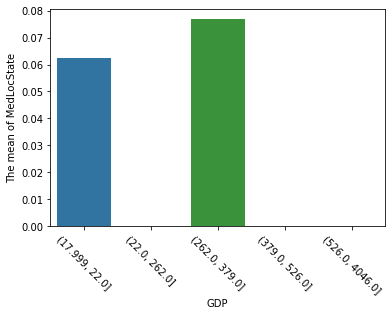

In [18]:
col = 'MedLocState'
tmp2 = gdp_data.groupby("gdp_bin")[col].mean().reset_index()
ax1 = sns.barplot(tmp2['gdp_bin'].to_list(),tmp2[col].to_list())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-45)
ax1.set_xlabel("GDP")
ax1.set_ylabel("The mean of "+col)

Text(0, 0.5, 'The mean of MedLocArmed')

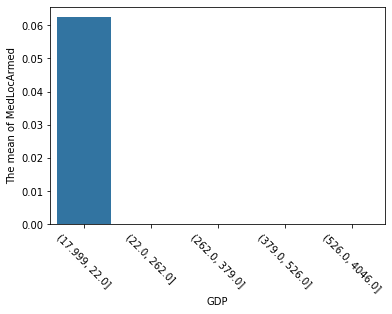

In [19]:
col = 'MedLocArmed'
tmp2 = gdp_data.groupby("gdp_bin")[col].mean().reset_index()
ax1 = sns.barplot(tmp2['gdp_bin'].to_list(),tmp2[col].to_list())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-45)
ax1.set_xlabel("GDP")
ax1.set_ylabel("The mean of "+col)

Text(0, 0.5, 'The mean of MedReDomEld')

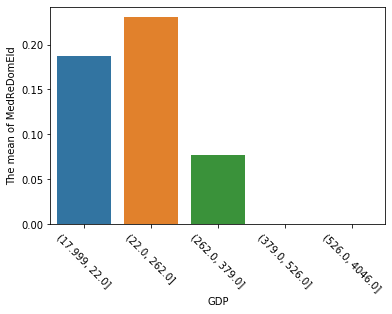

In [20]:
col = 'MedReDomEld'
tmp2 = gdp_data.groupby("gdp_bin")[col].mean().reset_index()
ax1 = sns.barplot(tmp2['gdp_bin'].to_list(),tmp2[col].to_list())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-45)
ax1.set_xlabel("GDP")
ax1.set_ylabel("The mean of "+col)

Text(0, 0.5, 'The mean of MedLocCivSoc')

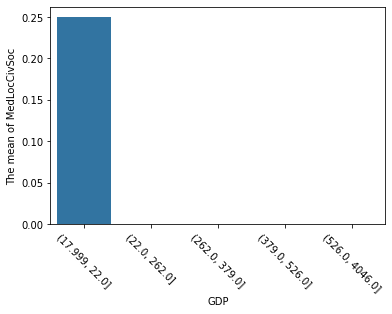

In [21]:
col = 'MedLocCivSoc'
tmp2 = gdp_data.groupby("gdp_bin")[col].mean().reset_index()
ax1 = sns.barplot(tmp2['gdp_bin'].to_list(),tmp2[col].to_list())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-45)
ax1.set_xlabel("GDP")
ax1.set_ylabel("The mean of "+col)

Text(0, 0.5, 'The mean of MedIntActor')

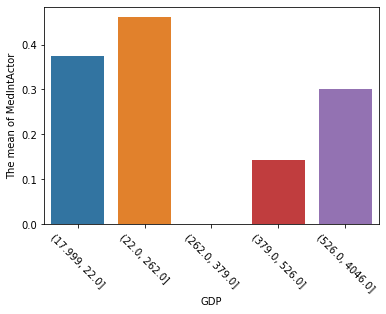

In [22]:
col = 'MedIntActor'
tmp2 = gdp_data.groupby("gdp_bin")[col].mean().reset_index()
ax1 = sns.barplot(tmp2['gdp_bin'].to_list(),tmp2[col].to_list())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-45)
ax1.set_xlabel("GDP")
ax1.set_ylabel("The mean of "+col)